In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [3]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [4]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [5]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [6]:
data.shape

(39209, 30, 30, 3)

In [8]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [9]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [10]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


In [11]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [12]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")


Epoch 1/15
981/981 [==============================] - 64s 65ms/step - loss: 1.8953 - accuracy: 0.5268 - val_loss: 0.3378 - val_accuracy: 0.9123
Epoch 2/15
981/981 [==============================] - 64s 65ms/step - loss: 0.5126 - accuracy: 0.8484 - val_loss: 0.2746 - val_accuracy: 0.9265
Epoch 3/15
981/981 [==============================] - 65s 66ms/step - loss: 0.3537 - accuracy: 0.8971 - val_loss: 0.0849 - val_accuracy: 0.9773
Epoch 4/15
981/981 [==============================] - 66s 67ms/step - loss: 0.2626 - accuracy: 0.9253 - val_loss: 0.0772 - val_accuracy: 0.9788
Epoch 5/15
981/981 [==============================] - 67s 69ms/step - loss: 0.2518 - accuracy: 0.9296 - val_loss: 0.0587 - val_accuracy: 0.9855
Epoch 6/15
981/981 [==============================] - 68s 69ms/step - loss: 0.2180 - accuracy: 0.9407 - val_loss: 0.1851 - val_accuracy: 0.9487
Epoch 7/15
981/981 [==============================] - 68s 70ms/step - loss: 0.1981 - accuracy: 0.9469 - val_loss: 0.0717 - val_accuracy:

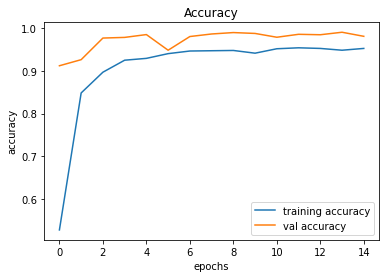

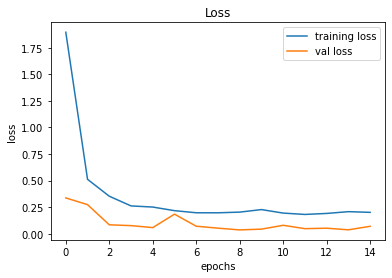

In [14]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [15]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [18]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

model.save('traffic_classifier.h5')

0.9471100554235946
